# Renat Rezyapov

## Which NHL player statistic changes between 2017-2018 have the largest effect on (i) change in ranking position (based on points) and (ii) number of goals scored in 2018?

The purpose of the question is to bring attention to which parameters the players can focus on imrproving in order to advance in the ranking based on the number of points in the next season, as well as the number of goals. 

In [32]:
# Importing the libraries nessesary for exploratory analysis, as well as the data.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df17 = pd.read_csv('../data/processed/clean2017.csv')
df18 = pd.read_csv('../data/processed/clean2018.csv')

In [2]:
# Chaged the formatting of the TOI column so it is in seconds instad of mm:ss.

def convert_time(time_str):
    minutes, seconds = time_str.split(':')
    return int(minutes)*60+int(seconds)

df17['TOI'] = df17['TOI'].apply(convert_time)
df18['TOI'] = df18['TOI'].apply(convert_time)

In [3]:
# Merged the 2017 set and 2018 set, added suffixes to differentiate between years.
# Now everything is is one dataframe

merged = df17.merge(df18, on='Name', suffixes=['_2017', '_2018'])

In [4]:
# Removed the percentage sign from the SH%_2017 and SH%_2018 columns.

merged[['SH%_2017', 'SH%_2018']] = merged[['SH%_2017', 'SH%_2018']].replace('%', '', regex=True)

In [5]:
# Indexed by name and reset index. 

merged = merged.set_index('Name').reset_index()

In [6]:
#Preview of dataframe

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
merged

,Name,Rk_2017,GP_2017,G_2017,A_2017,P_2017,PIM_2017,+/-_2017,TOI_2017,PPG_2017,GWG_2017,PPP_2017,G/GP_2017,A/GP_2017,P/GP_2017,SHOTS_2017,SH%_2017,HITS_2017,BS_2017,Rk_2018,GP_2018,G_2018,A_2018,P_2018,PIM_2018,+/-_2018,TOI_2018,PPG_2018,GWG_2018,PPP_2018,G/GP_2018,A/GP_2018,P/GP_2018,SHOTS_2018,SH%_2018,HITS_2018,BS_2018
0,Aaron Ekblad,185,82,16,22,38,71,9,1402,5,4,11,0.195,0.268,0.463,189,8.50,69,121,193,82,13,24,37,47,1,1418,5,1,10,0.159,0.293,0.451,180,7.20,114,88
1,Adam Henrique,115,81,24,26,50,20,11,1066,6,8,13,0.296,0.321,0.617,151,15.90,61,61,155,82,18,24,42,24,-5,987,8,3,13,0.220,0.293,0.512,122,14.80,78,71
2,Adrian Kempe,193,81,16,21,37,49,11,799,1,3,5,0.198,0.259,0.457,119,13.50,91,18,280,81,12,16,28,50,-10,870,0,2,4,0.148,0.198,0.346,118,10.20,86,21
3,Aleksander Barkov,25,79,27,51,78,14,9,1324,5,3,17,0.342,0.646,0.987,256,10.60,30,67,10,82,35,61,96,8,-3,1341,13,5,31,0.427,0.744,1.171,206,17.00,28,61
4,Alex DeBrincat,102,82,28,24,52,6,6,888,6,1,12,0.341,0.293,0.634,181,15.50,40,25,33,82,41,35,76,15,0,1062,13,3,24,0.500,0.427,0.927,220,18.60,35,26
5,Alex Galchenyuk,109,82,19,32,51,22,-31,974,9,2,24,0.232,0.390,0.622,213,8.90,33,37,161,72,19,22,41,34,-19,943,9,4,21,0.264,0.306,0.569,159,12.00,62,34
6,Alex Goligoski,214,78,12,23,35,26,-31,1396,3,3,11,0.154,0.295,0.449,119,10.10,114,154,303,76,3,24,27,16,-7,1249,1,0,7,0.039,0.316,0.355,102,2.90,79,154
7,Alex Killorn,136,82,15,32,47,45,22,990,2,1,9,0.183,0.390,0.573,156,9.60,82,25,169,82,18,22,40,45,22,892,2,2,5,0.220,0.268,0.488,153,11.80,88,23
8,Alex Pietrangelo,97,78,15,39,54,22,8,1544,3,5,13,0.192,0.500,0.692,216,6.90,48,164,164,71,13,28,41,22,2,1444,3,2,15,0.183,0.394,0.577,168,7.70,62,139
9,Alex Tuch,195,78,15,22,37,27,3,913,4,4,10,0.192,0.282,0.474,171,8.80,99,42,105,74,20,32,52,8,13,1003,3,6,6,0.270,0.432,0.703,180,11.10,92,40


In [7]:
# Converting every column except Name into a float for calculations.

for col in merged.columns:
    if col != 'Name':
        merged[col] = merged[col].astype(float)
merged.dtypes

Name           object
Rk_2017       float64
GP_2017       float64
G_2017        float64
A_2017        float64
P_2017        float64
PIM_2017      float64
+/-_2017      float64
TOI_2017      float64
PPG_2017      float64
GWG_2017      float64
PPP_2017      float64
G/GP_2017     float64
A/GP_2017     float64
P/GP_2017     float64
SHOTS_2017    float64
SH%_2017      float64
HITS_2017     float64
BS_2017       float64
Rk_2018       float64
GP_2018       float64
G_2018        float64
A_2018        float64
P_2018        float64
PIM_2018      float64
+/-_2018      float64
TOI_2018      float64
PPG_2018      float64
GWG_2018      float64
PPP_2018      float64
G/GP_2018     float64
A/GP_2018     float64
P/GP_2018     float64
SHOTS_2018    float64
SH%_2018      float64
HITS_2018     float64
BS_2018       float64
dtype: object

In [8]:
# Saving this dataframe as csv.

merged.to_csv('../data/processed/merged.csv', index=False)

In [38]:
# Exploring the dataset using the describe function.

merged.describe()

,Rk_2017,GP_2017,G_2017,A_2017,P_2017,PIM_2017,+/-_2017,TOI_2017,PPG_2017,GWG_2017,PPP_2017,G/GP_2017,A/GP_2017,P/GP_2017,SHOTS_2017,SH%_2017,HITS_2017,BS_2017,Rk_2018,GP_2018,G_2018,A_2018,P_2018,PIM_2018,+/-_2018,TOI_2018,PPG_2018,GWG_2018,PPP_2018,G/GP_2018,A/GP_2018,P/GP_2018,SHOTS_2018,SH%_2018,HITS_2018,BS_2018
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,119.337778,76.871111,20.382222,32.933333,53.315556,33.915556,2.457778,1118.088889,5.413333,3.324444,15.537778,0.265622,0.429458,0.695053,184.671111,11.136889,72.395556,52.977778,135.622222,74.982222,20.191111,32.395556,52.586667,33.404444,1.475556,1121.128889,4.844444,3.231111,14.360000,0.267382,0.432213,0.699578,176.862222,11.168889,73.057778,50.364444
std,71.573274,6.997213,8.879935,12.503571,16.995876,20.680973,14.962430,180.818331,3.718054,2.174646,8.532482,0.113192,0.158882,0.213646,50.790170,3.889790,43.783446,35.712323,91.661082,9.212746,10.500166,14.268753,21.124267,20.500239,13.548872,183.321235,4.190527,2.074486,9.188463,0.131830,0.177400,0.254368,55.109336,4.245976,43.348167,34.845585
min,1.000000,44.000000,5.000000,13.000000,32.000000,2.000000,-42.000000,747.000000,0.000000,0.000000,0.000000,0.061000,0.171000,0.390000,70.000000,2.800000,7.000000,14.000000,1.000000,33.000000,2.000000,9.000000,23.000000,4.000000,-41.000000,733.000000,0.000000,0.000000,0.000000,0.027000,0.113000,0.309000,62.000000,1.800000,5.000000,7.000000
25%,57.000000,74.000000,14.000000,23.000000,40.000000,20.000000,-6.000000,988.000000,3.000000,2.000000,9.000000,0.188000,0.304000,0.524000,149.000000,8.300000,40.000000,28.000000,57.000000,72.000000,13.000000,22.000000,36.000000,20.000000,-8.000000,991.000000,2.000000,2.000000,7.000000,0.171000,0.299000,0.494000,136.000000,8.000000,42.000000,26.000000
50%,119.000000,80.000000,19.000000,31.000000,49.000000,30.000000,2.000000,1087.000000,5.000000,3.000000,14.000000,0.244000,0.394000,0.646000,182.000000,11.200000,61.000000,42.000000,120.000000,78.000000,18.000000,28.000000,48.000000,28.000000,0.000000,1100.000000,4.000000,3.000000,13.000000,0.250000,0.402000,0.646000,176.000000,11.500000,61.000000,40.000000
75%,179.000000,82.000000,25.000000,41.000000,64.000000,43.000000,11.000000,1208.000000,7.000000,4.000000,21.000000,0.342000,0.526000,0.833000,214.000000,13.800000,95.000000,64.000000,201.000000,82.000000,27.000000,41.000000,69.000000,44.000000,12.000000,1244.000000,7.000000,5.000000,20.000000,0.354000,0.537000,0.862000,209.000000,14.100000,98.000000,61.000000
max,250.000000,82.000000,49.000000,68.000000,108.000000,187.000000,49.000000,1609.000000,20.000000,12.000000,42.000000,0.598000,0.893000,1.317000,355.000000,23.500000,250.000000,203.000000,347.000000,83.000000,51.000000,87.000000,128.000000,153.000000,39.000000,1601.000000,20.000000,10.000000,48.000000,0.630000,1.061000,1.561000,365.000000,21.800000,235.000000,166.000000


In [13]:
# Calculating the change in performance statistics between the two years.

change_st = merged.copy()

for col in df17.columns:
    if col != "Name":
        change_st[col] = change_st[col + "_2018"] - change_st[col + "_2017"]
        change_st = change_st.drop([col + "_2017", col + "_2018"], axis=1)

change_st

,Name,Rk,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS
0,Aaron Ekblad,8.0,0.0,-3.0,2.0,-1.0,-24.0,-8.0,16.0,0.0,-3.0,-1.0,-0.036,0.025,-0.012,-9.0,-1.3,45.0,-33.0
1,Adam Henrique,40.0,1.0,-6.0,-2.0,-8.0,4.0,-16.0,-79.0,2.0,-5.0,0.0,-0.076,-0.028,-0.105,-29.0,-1.1,17.0,10.0
2,Adrian Kempe,87.0,0.0,-4.0,-5.0,-9.0,1.0,-21.0,71.0,-1.0,-1.0,-1.0,-0.050,-0.061,-0.111,-1.0,-3.3,-5.0,3.0
3,Aleksander Barkov,-15.0,3.0,8.0,10.0,18.0,-6.0,-12.0,17.0,8.0,2.0,14.0,0.085,0.098,0.184,-50.0,6.4,-2.0,-6.0
4,Alex DeBrincat,-69.0,0.0,13.0,11.0,24.0,9.0,-6.0,174.0,7.0,2.0,12.0,0.159,0.134,0.293,39.0,3.1,-5.0,1.0
5,Alex Galchenyuk,52.0,-10.0,0.0,-10.0,-10.0,12.0,12.0,-31.0,0.0,2.0,-3.0,0.032,-0.084,-0.053,-54.0,3.1,29.0,-3.0
6,Alex Goligoski,89.0,-2.0,-9.0,1.0,-8.0,-10.0,24.0,-147.0,-2.0,-3.0,-4.0,-0.115,0.021,-0.094,-17.0,-7.2,-35.0,0.0
7,Alex Killorn,33.0,0.0,3.0,-10.0,-7.0,0.0,0.0,-98.0,0.0,1.0,-4.0,0.037,-0.122,-0.085,-3.0,2.2,6.0,-2.0
8,Alex Pietrangelo,67.0,-7.0,-2.0,-11.0,-13.0,0.0,-6.0,-100.0,0.0,-3.0,2.0,-0.009,-0.106,-0.115,-48.0,0.8,14.0,-25.0
9,Alex Tuch,-90.0,-4.0,5.0,10.0,15.0,-19.0,10.0,90.0,-1.0,2.0,-4.0,0.078,0.150,0.229,9.0,2.3,-7.0,-2.0


In [14]:
# Ranking has inverse order (best one is smallest value), therefore we need to change the sign.

change_st['Rk'] = change_st['Rk'].apply(lambda x: -x)

In [15]:
#Preview of dataframe
# This dataframe contains the difference between the 2017 and 2018 values.

change_st

,Name,Rk,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS
0,Aaron Ekblad,-8.0,0.0,-3.0,2.0,-1.0,-24.0,-8.0,16.0,0.0,-3.0,-1.0,-0.036,0.025,-0.012,-9.0,-1.3,45.0,-33.0
1,Adam Henrique,-40.0,1.0,-6.0,-2.0,-8.0,4.0,-16.0,-79.0,2.0,-5.0,0.0,-0.076,-0.028,-0.105,-29.0,-1.1,17.0,10.0
2,Adrian Kempe,-87.0,0.0,-4.0,-5.0,-9.0,1.0,-21.0,71.0,-1.0,-1.0,-1.0,-0.050,-0.061,-0.111,-1.0,-3.3,-5.0,3.0
3,Aleksander Barkov,15.0,3.0,8.0,10.0,18.0,-6.0,-12.0,17.0,8.0,2.0,14.0,0.085,0.098,0.184,-50.0,6.4,-2.0,-6.0
4,Alex DeBrincat,69.0,0.0,13.0,11.0,24.0,9.0,-6.0,174.0,7.0,2.0,12.0,0.159,0.134,0.293,39.0,3.1,-5.0,1.0
5,Alex Galchenyuk,-52.0,-10.0,0.0,-10.0,-10.0,12.0,12.0,-31.0,0.0,2.0,-3.0,0.032,-0.084,-0.053,-54.0,3.1,29.0,-3.0
6,Alex Goligoski,-89.0,-2.0,-9.0,1.0,-8.0,-10.0,24.0,-147.0,-2.0,-3.0,-4.0,-0.115,0.021,-0.094,-17.0,-7.2,-35.0,0.0
7,Alex Killorn,-33.0,0.0,3.0,-10.0,-7.0,0.0,0.0,-98.0,0.0,1.0,-4.0,0.037,-0.122,-0.085,-3.0,2.2,6.0,-2.0
8,Alex Pietrangelo,-67.0,-7.0,-2.0,-11.0,-13.0,0.0,-6.0,-100.0,0.0,-3.0,2.0,-0.009,-0.106,-0.115,-48.0,0.8,14.0,-25.0
9,Alex Tuch,90.0,-4.0,5.0,10.0,15.0,-19.0,10.0,90.0,-1.0,2.0,-4.0,0.078,0.150,0.229,9.0,2.3,-7.0,-2.0


<AxesSubplot:>

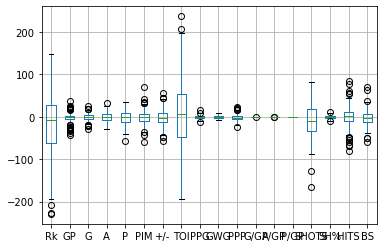

In [42]:
# Creating boxplots for every column to visualise the distribution of the values.

change_st.boxplot()

## (i) Which NHL player statistic changes between 2017-2018 have the largest effect on change in ranking position (based on points)?

In [25]:
# Finding the order of correlation of columns to Change in Ranking.

change_st.corr()['Rk'].abs().sort_values(ascending=False)

Rk       1.000000
P        0.883703
A        0.779126
P/GP     0.731274
G        0.644821
SHOTS    0.625945
A/GP     0.593889
GP       0.516724
G/GP     0.512632
PPP      0.508165
TOI      0.418354
SH%      0.414191
GWG      0.322695
PPG      0.310823
+/-      0.296901
BS       0.253937
HITS     0.151650
PIM      0.137640
Name: Rk, dtype: float64

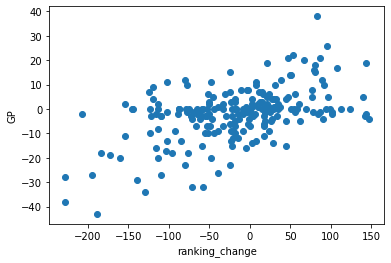

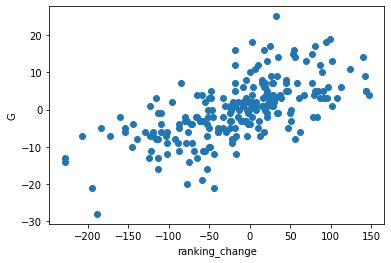

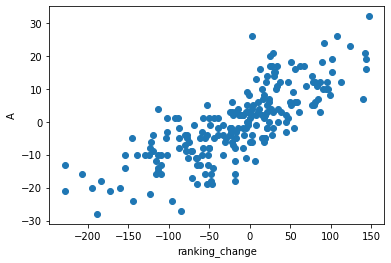

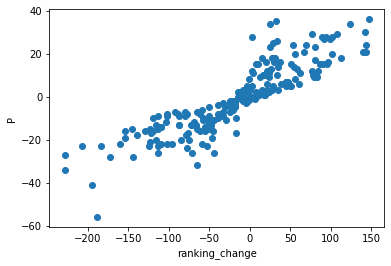

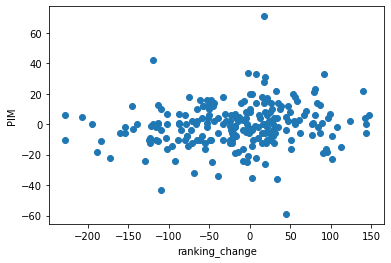

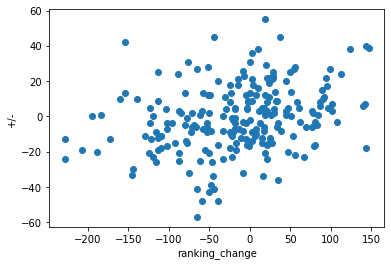

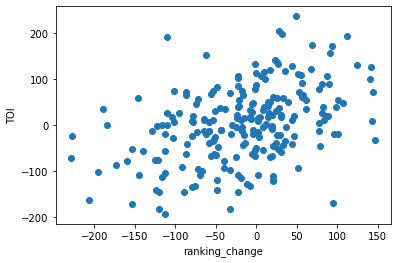

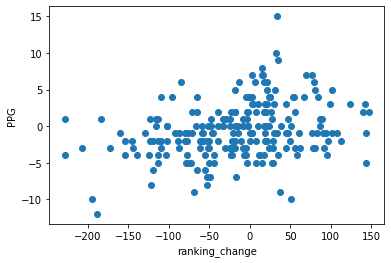

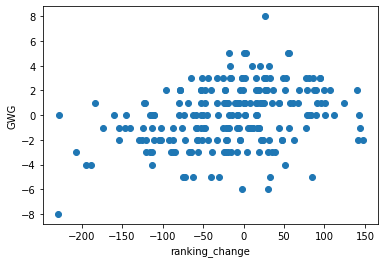

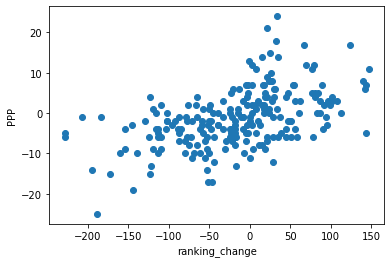

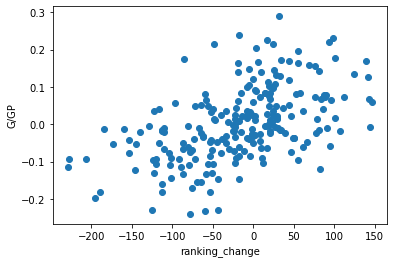

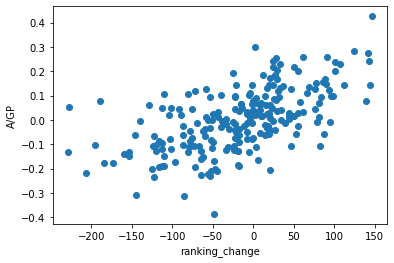

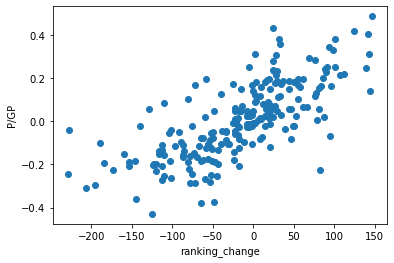

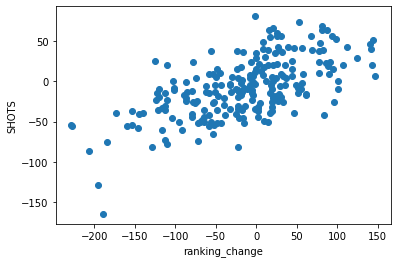

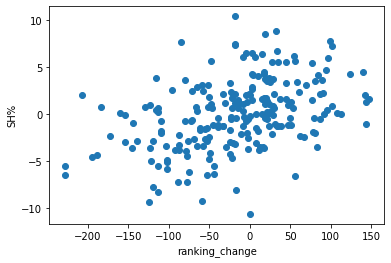

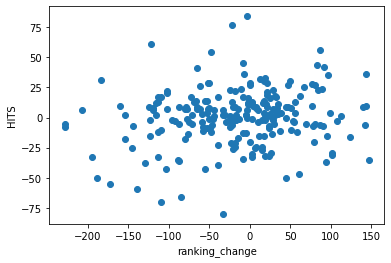

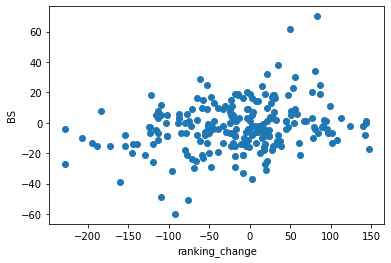

In [24]:
# Plotting every column except 'Name' and 'Rk' agaist "Rk".
# Here, we can visually see how change in each statistic correlates with change in players' ranking.

for col in change_st.columns:
    if col in ['Name', 'Rk']:
        continue
    plt.scatter(change_st['Rk'], change_st[col])
    plt.xlabel('ranking_change')
    plt.ylabel(col)
    plt.show()

## Clarification regarding what each column in the data represents:

- Rk = Ranking
- GP = Games Played
- G = Goals
- A = Assists
- P = Points (Sum of G and A)
- PIM = Penalty Infraction Minutes
- +/- = Plus/minus
- TOI = Time on Ice
- PPG = Power Play Goals
- GWG = Game-Winning Points
- PPP = Power Play Points
- G/GP = Goals per Game Played
- A/GP = Assists per Game Played
- P/GP = Points per Game Played
- SHOTS = Shots
- SH% = Shot Percentage
- HITS = Hits
- BS = Blocked Shots

## Discussion of Results (i)

From the plots and the values given by the correlation function, we can conclude that the strongest correlations exist between 'change in ranking based on points' and:


1. **Points** - not surprising, as the ranking is based on points, therefore there is a direct correlation.

2. **Assists** - not surprising either, as Points = Assists + Goals. Although it can be noted that assits have a bigger effect on ranking than goals. 

3. **Points per Game Played** - same as Points.

4. **Goals** - same as assists, there is a direct correlation to ranking based on points. Interesting to note that goals have a lesser effect on points than assists. 

5. **Shots** - correlates with the number of goals. The more shots a player takes, the more goals are likely to be scored. This is a good metric for a hockey player to try to improve upon in order to go up in ranking. 


The top 5 correlations with 'change in ranking based on points' make perfect sense, as they directly relate to the calculation of 'points'. 

Since these parameters directly relate to the calculation of ranking based on points, it might be more interesting to look at the next 5 in the order of correlation to see if any unusual relationships can be found.


6. **Assists per Game Played** - similar to 'Points per Game played', no unusual relationship.

7. **Games Played** - makes perfect sense, as the more games a player attends, he will get more opportunities to get more points. 

8. **Goals per Game Played** - mimilar to 'Points per Game played' and 'Assists per Game played'. Though, it can be noted that assists per game played have a larger effect on ranking.

9. **Power Play Points** - again, it is a measure of points therefore it directly relates to ranking. 

10. **Time on Ice** - similarly to games played, more time on ice means more opportunities for the player to make contributions which will add up to the calculation of points. 



## (ii) Which NHL player statistic changes between 2017-2018 have the largest effect on the number of goals scored in 2018?

In [27]:
# Finding the order of correlation of columns to Change in Ranking.
# Adding the number of goals scored in 2018 to the dataframe cointaining the change in parameters.

part2 = change_st.join(merged['G_2018'])

part2.corr()['G_2018'].abs().sort_values(ascending=False)

G_2018    1.000000
G         0.570182
P         0.539219
G/GP      0.534488
P/GP      0.479709
Rk        0.473783
SH%       0.442594
PPG       0.437704
PPP       0.437191
SHOTS     0.435101
TOI       0.355064
A         0.345089
GWG       0.246004
GP        0.241709
A/GP      0.238720
BS        0.213659
PIM       0.120625
HITS      0.114302
+/-       0.102642
Name: G_2018, dtype: float64

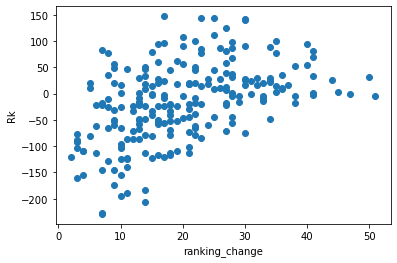

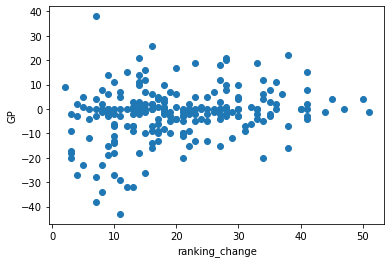

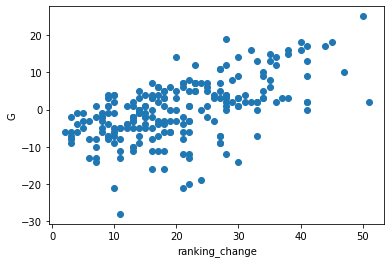

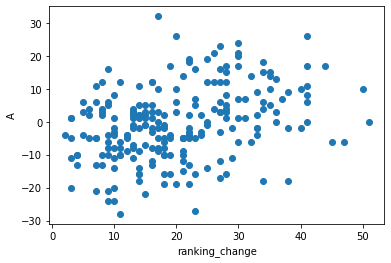

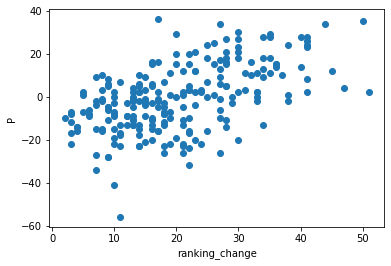

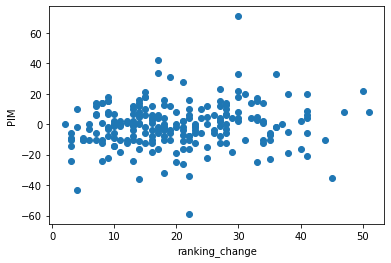

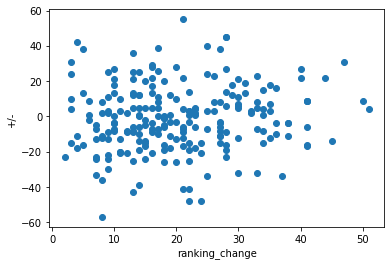

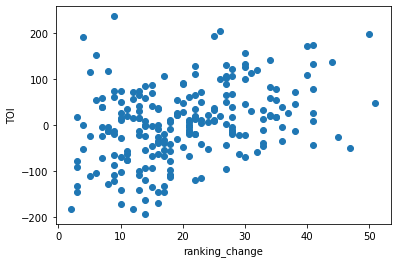

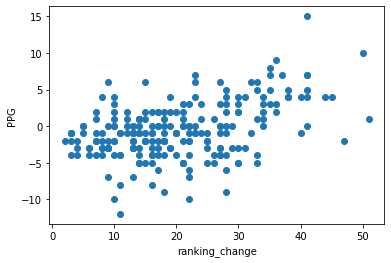

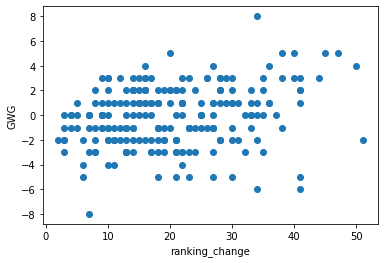

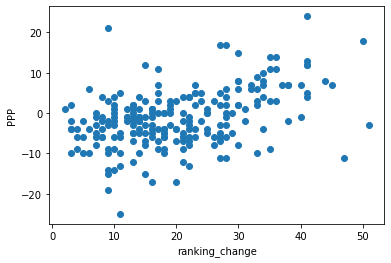

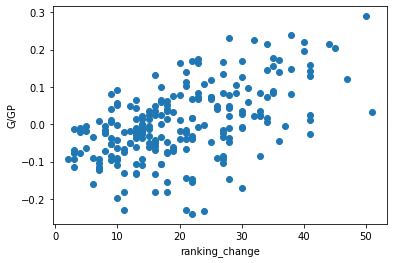

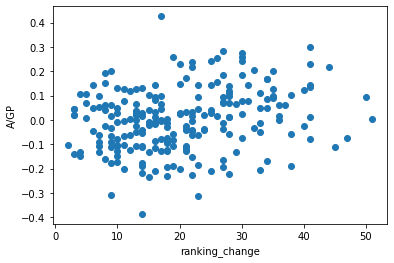

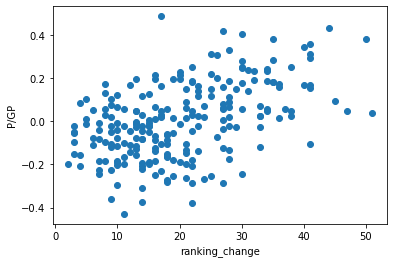

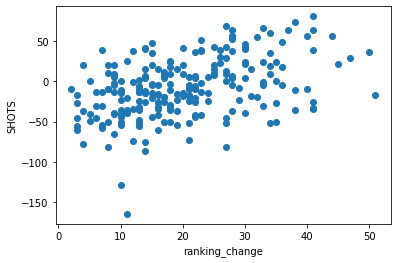

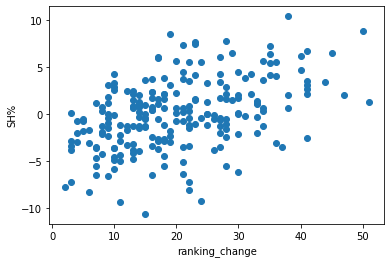

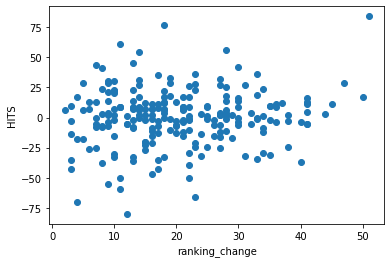

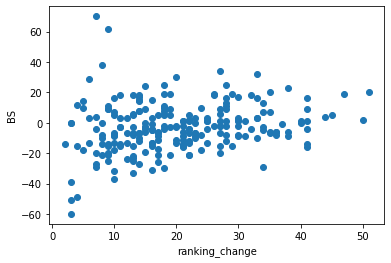

In [29]:
# Plotting every column except 'Name' and 'G_2018' agaist "G_2018".
# Here, we can visually see how change in each statistic correlates with number of goals in 2018.

for col in part2.columns:
    if col in ['Name', 'G_2018']:
        continue
    plt.scatter(part2['G_2018'], part2[col])
    plt.xlabel('ranking_change')
    plt.ylabel(col)
    plt.show()

## Discussion of Results (ii)

The order in which different parameters are correlated with the number of goals scored in 2018 is:

1. **Goals** - this one comes as no surprise since it is the number of goals itself. The increase in the number of goals directly correlates with the number of goals in 2018. 

2. **Points** - the number of points indirectly relates to goals, as points = goalss + assists.

3. **Goals per Game Played** - similar to goals, this comes as no surprise.

4. **Points per Game Played** - again, this is similar to points.

5. **Ranking** - similar to points, because it is ranking based on points.

6. **Shot Percentage** - this variable represents the percentage of shots that became goals. In other words, this is the accuracy of the taken shots. We can see how important this parameter becomes when trying to imporve the number of goals scored. 

7. **Power Play Goals** - goals which have been scored during a man disadvantage, which will have a direct effect on the number of total goals scored in a season. 

8. **Power Play Points** - it is likely that power play goals have a big effect on this variable, as points = goals + assists. 

9. **Shots** - the number of shots plays an important role whn it comes to scoring goals. 

10. **Time on Ice** - more time on ice is going to give a player more opportunities to score more goals.

